In [225]:
import json
with open('gearnet_ablation_pipeline.json', 'r') as f:
    data = json.load(f)


In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_rows', 50)
ls = []
for param_and_trials in data:
    for trial in param_and_trials['trials']:
        ls.append({**param_and_trials['parameters'], **trial[-4]})

df_raw = pd.DataFrame(ls)
df_raw

,layer,knn_k,spatial_radius,sequential_max_distance,sensitivity,specificity,accuracy,precision,mcc,micro_auroc,train_bce,valid_mcc
0,4,5,5.0,1,0.331738,0.984406,0.950603,0.537468,0.398264,0.798819,0.088955,0.329504
1,4,5,5.0,1,0.138756,0.995644,0.951264,0.635036,0.281577,0.773448,0.146139,0.311670
2,4,5,5.0,1,0.331738,0.987804,0.953825,0.597701,0.423797,0.796027,0.061563,0.316079
3,4,5,5.0,2,0.296651,0.988152,0.952338,0.577640,0.392244,0.808490,0.126464,0.387330
4,4,5,5.0,2,0.333333,0.989023,0.955064,0.623881,0.435505,0.819592,0.016517,0.424621
...,...,...,...,...,...,...,...,...,...,...,...,...
258,4,0,10.0,7,0.440191,0.981706,0.953659,0.567901,0.476290,0.891042,0.017953,0.444840
259,4,0,10.0,7,0.425837,0.985887,0.956881,0.622378,0.493513,0.901632,0.017856,0.435090
260,4,0,10.0,7,0.398724,0.986323,0.955890,0.614251,0.473400,0.883298,0.016816,0.460544
261,4,0,10.0,8,0.358852,0.986410,0.953907,0.590551,0.438243,0.890671,0.008554,0.418429


In [227]:
df_stat = df_raw.groupby(['layer', 'knn_k', 'spatial_radius', 'sequential_max_distance']).aggregate(['mean', 'std']).sort_values(('mcc', 'mean'), ascending=False)
df_stat

sensitivity            \
                                                          mean       std   
layer knn_k spatial_radius sequential_max_distance                         
4     0     10.0           7                          0.421584  0.021058   
      5     10.0           4                          0.427432  0.051853   
      10    10.0           5                          0.423711  0.077387   
      15    10.0           7                          0.429559  0.030107   
      10    5.0            7                          0.423711  0.071225   
...                                                        ...       ...   
      15    15.0           1                          0.283892  0.045643   
      10    15.0           1                          0.335460  0.084655   
      5     15.0           2                          0.220627  0.088948   
      10    15.0           2                          0.215311  0.123303   
      5     15.0           1                          0.232855  0.088528   

                                                   specificity            \
                                                          mean       std   
layer knn_k spatial_radius sequential_max_distance                         
4     0     10.0           7                          0.984639  0.002549   
      5     10.0           4                          0.983477  0.003617   
      10    10.0           5                          0.983680  0.006441   
      15    10.0           7                          0.983012  0.004332   
      10    5.0            7                          0.983332  0.007824   
...                                                        ...       ...   
      15    15.0           1                          0.979528  0.011500   
      10    15.0           1                          0.969190  0.009543   
      5     15.0           2                          0.987252  0.011722   
      10    15.0           2                          0.985277  0.020397   
      5     15.0           1                          0.983738  0.011440   

                                                    accuracy            \
                                                        mean       std   
layer knn_k spatial_radius sequential_max_distance                       
4     0     10.0           7                        0.955477  0.001650   
      5     10.0           4                        0.954678  0.002967   
      10    10.0           5                        0.954678  0.002485   
      15    10.0           7                        0.954348  0.002892   
      10    5.0            7                        0.954348  0.003758   
...                                                      ...       ...   
      15    15.0           1                        0.943499  0.008550   
      10    15.0           1                        0.936368  0.007231   
      5     15.0           2                        0.947547  0.006727   
      10    15.0           2                        0.945399  0.013020   
      5     15.0           1                        0.944848  0.006292   

                                                   precision            \
                                                        mean       std   
layer knn_k spatial_radius sequential_max_distance                       
4     0     10.0           7                        0.601510  0.029388   
      5     10.0           4                        0.587720  0.047034   
      10    10.0           5                        0.597896  0.065480   
      15    10.0           7                        0.584168  0.046769   
      10    5.0            7                        0.598436  0.089104   
...                                                      ...       ...   
      15    15.0           1                        0.460730  0.118762   
      10    15.0           1                        0.377420  0.053715   
      5     15.0           2                        0.545055  0.133442

In [228]:
df = df_raw.groupby(['layer', 'knn_k', 'spatial_radius', 'sequential_max_distance']).aggregate(['mean', 'size']).sort_values('sequential_max_distance').reset_index()
df

layer knn_k spatial_radius sequential_max_distance sensitivity       \
                                                             mean size   
0      4     0           10.0                       1    0.324296    3   
1      4    15           10.0                       1    0.366826    3   
2      4    15            5.0                       1    0.387560    3   
3      4     5            5.0                       1    0.267411    3   
4      4     5           15.0                       1    0.232855    3   
..   ...   ...            ...                     ...         ...  ...   
83     4    10           10.0                       8    0.401382    3   
84     4    15            5.0                       8    0.413610    3   
85     4     5            5.0                       8    0.337586    3   
86     4    15           10.0                       8    0.376396    3   
87     4     0           10.0                       8    0.417863    2   

   specificity       accuracy      precision            mcc      micro_auroc  \
          mean size      mean size      mean size      mean size        mean   
0     0.985713    3  0.951457    3  0.559832    3  0.401942    3    0.863296   
1     0.979499    3  0.947767    3  0.500603    3  0.401283    3    0.860832   
2     0.975317    3  0.944876    3  0.466133    3  0.395950    3    0.854523   
3     0.989285    3  0.951897    3  0.590068    3  0.367879    3    0.789431   
4     0.983738    3  0.944848    3  0.478241    3  0.298597    3    0.829081   
..         ...  ...       ...  ...       ...  ...       ...  ...         ...   
83    0.982432    3  0.952338    3  0.563734    3  0.450603    3    0.887345   
84    0.978482    3  0.949226    3  0.515218    3  0.434778    3    0.871118   
85    0.989256    3  0.955504    3  0.639177    3  0.443118    3    0.851766   
86    0.985423    3  0.953880    3  0.587767    3  0.447356    3    0.886536   
87    0.981706    2  0.952503    2  0.560817    2  0.457946    2    0.892214   

        train_bce      valid_mcc       
   size      mean size      mean size  
0     3  0.037694    3  0.417215    3  
1     3  0.059825    3  0.401096    3  
2     3  0.046060    3  0.384342    3  
3     3  0.098886    3  0.319084    3  
4     3  0.090066    3  0.333821    3  
..  ...       ...  ...       ...  ...  
83    3  0.043885    3  0.444822    3  
84    3  0.092376    3  0.426491    3  
85    3  0.096875    3  0.421501    3  
86    3  0.022258    3  0.441257    3  
87    2  0.011719    2  0.425201    2  

[88 rows x 20 columns]

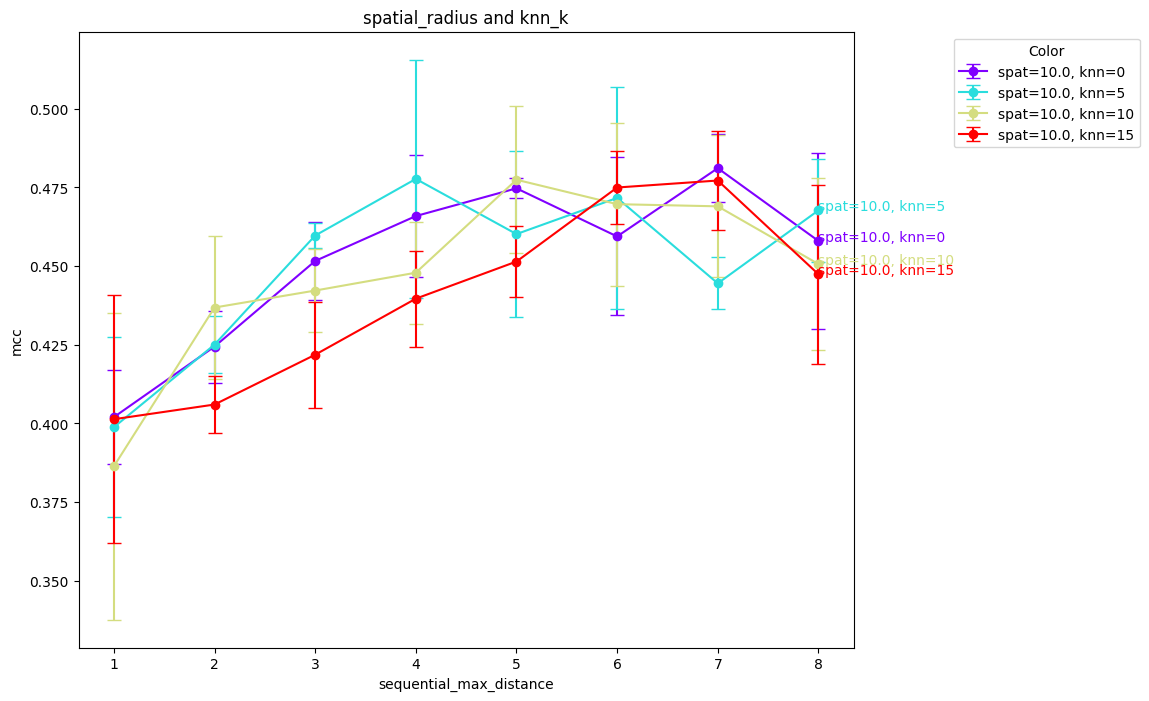

In [235]:
def plot_by_spat_and_knn(df_raw):
    df = df_raw.groupby(
        ['knn_k', 'spatial_radius', 'sequential_max_distance']
    ).aggregate(['mean', 'std']).sort_values('sequential_max_distance').reset_index()
    colors = plt.cm.rainbow(np.linspace(0, 1, len(df.groupby(['spatial_radius', 'knn_k']))))
    plt.figure(figsize=(10, 8))
    for ((spatial_radius, knn_k), group), color in zip(df.groupby(['spatial_radius', 'knn_k']), colors):
        label = f'spat={spatial_radius}, knn={knn_k}'
        plt.errorbar(x=group['sequential_max_distance'], y=group[('mcc', 'mean')], yerr=group[('mcc', 'std')], capsize=5,
                      marker='o', label=label, color=color)
        plt.annotate(label, (group['sequential_max_distance'].iloc[-1], group[('mcc', 'mean')].iloc[-1]), color=color)

    plt.legend(title='Color', bbox_to_anchor=(1.12, 1), loc='upper left')
    plt.xlabel('sequential_max_distance')
    plt.ylabel('mcc')
    plt.title('spatial_radius and knn_k')
    plt.show()

plot_by_spat_and_knn(df_raw[df_raw['spatial_radius'] == 10.0])

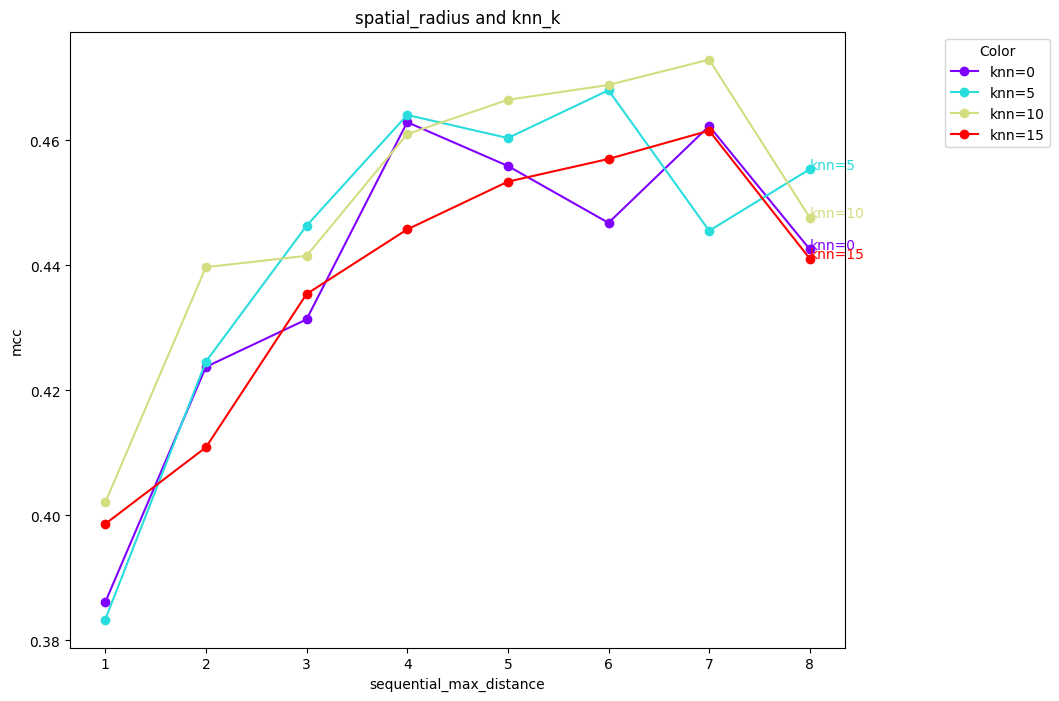

In [230]:
def plot_by_knn(df_raw):
    df = df_raw.groupby(
        ['knn_k', 'sequential_max_distance']
    ).aggregate(['mean', 'std']).sort_values('sequential_max_distance').reset_index()
    
    group_by_cols = ['knn_k']
    colors = plt.cm.rainbow(np.linspace(0, 1, len(df.groupby(group_by_cols))))
    plt.figure(figsize=(10, 8))
    for ((knn_k,), group), color in zip(df.groupby(group_by_cols), colors):
        label = f'knn={knn_k}'
        plt.plot(group['sequential_max_distance'], group[('mcc', 'mean')], marker='o', label=label, color=color)
        plt.annotate(label, (group['sequential_max_distance'].iloc[-1], group[('mcc', 'mean')].iloc[-1]), color=color)

    plt.legend(title='Color', bbox_to_anchor=(1.12, 1), loc='upper left')
    plt.xlabel('sequential_max_distance')
    plt.ylabel('mcc')
    plt.title('spatial_radius and knn_k')
    plt.show()

plot_by_knn(df_raw[df_raw['spatial_radius'] < 15])

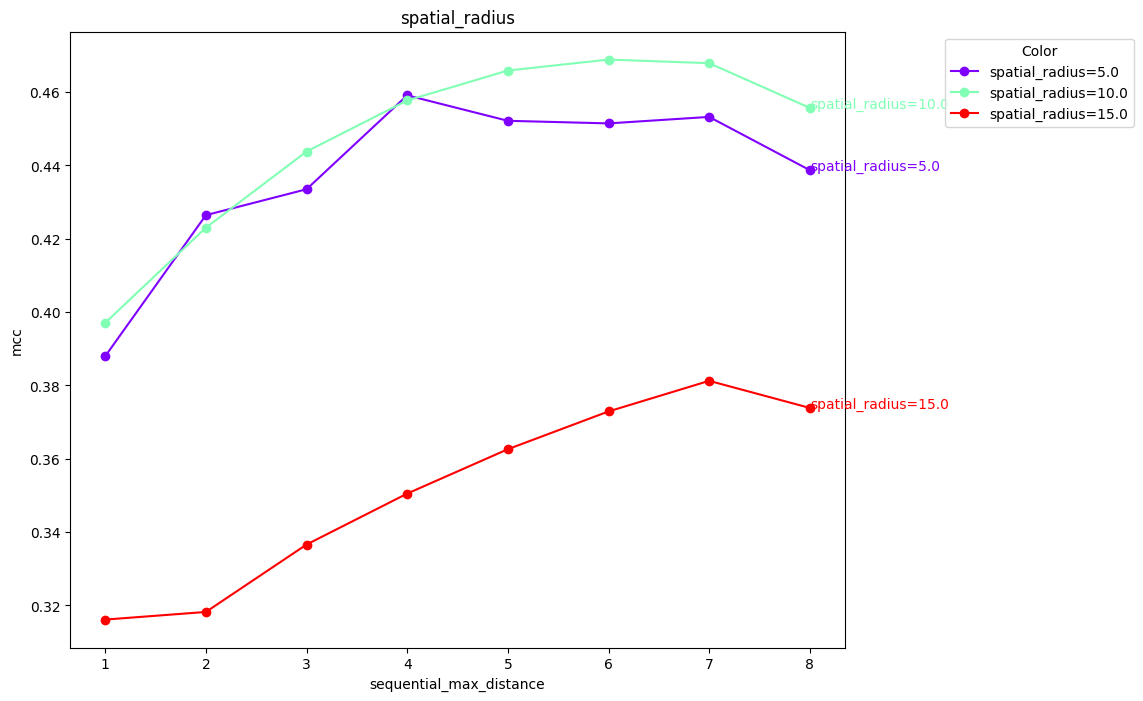

In [231]:
def plot_by_spat(df_raw):
    df = df_raw.groupby(
        ['spatial_radius', 'sequential_max_distance']
    ).aggregate(['mean', 'std']).sort_values('sequential_max_distance').reset_index()
    
    group_by_cols = ['spatial_radius']
    colors = plt.cm.rainbow(np.linspace(0, 1, len(df.groupby(group_by_cols))))
    plt.figure(figsize=(10, 8))
    for ((spatial_radius,), group), color in zip(df.groupby(group_by_cols), colors):
        label = f'spatial_radius={spatial_radius}'
        plt.plot(group['sequential_max_distance'], group[('mcc', 'mean')], marker='o', label=label, color=color)
        plt.annotate(label, (group['sequential_max_distance'].iloc[-1], group[('mcc', 'mean')].iloc[-1]), color=color)

    plt.legend(title='Color', bbox_to_anchor=(1.12, 1), loc='upper left')
    plt.xlabel('sequential_max_distance')
    plt.ylabel('mcc')
    plt.title('spatial_radius')
    plt.show()

plot_by_spat(df_raw)